# Tutorial 7: Exploratory Data Analysis (EDA)

## Objectives

After this tutorial you will be able to:

*   Understand the importance of EDA
*   Apply EDA techniques to different data types
*   Assess relationships between variables
*   Coummunicate findings effectively
*   Apply EDA to real-world datasets

<h2>Table of Contents</h2>

<ol>
    <li>
        <a href="#import-1">Import dataset</a>
    </li>
    <br>
    <li>
        <a href="#desc">Descriptive Analysis</a>
    </li>
    <br>
    <li>
        <a href="#corr">Correlation Statistics</a>
    </li>
    <br>
</ol>


<hr id="import">

<h2>1. Import the dataset</h2>

Import the `Pandas` library

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Read the data from `csv` into a `Pandas DataFrame`

In [24]:
df = pd.read_csv('CO2_Emissions_Canada.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size [L],Cylinders,Transmission,Fuel Type,Fuel Consumption City [L/100 km],Fuel Consumption Hwy [L/100 km],Fuel Consumption Comb [L/100 km],Fuel Consumption Comb [mpg],CO2 Emissions [g/km]
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [25]:
df.tail()

,Make,Model,Vehicle Class,Engine Size [L],Cylinders,Transmission,Fuel Type,Fuel Consumption City [L/100 km],Fuel Consumption Hwy [L/100 km],Fuel Consumption Comb [L/100 km],Fuel Consumption Comb [mpg],CO2 Emissions [g/km]
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


Get information about the columns of the `DataFrame`

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size [L]                   7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City [L/100 km]  7385 non-null   float64
 8   Fuel Consumption Hwy [L/100 km]   7385 non-null   float64
 9   Fuel Consumption Comb [L/100 km]  7385 non-null   float64
 10  Fuel Consumption Comb [mpg]       7385 non-null   int64  
 11  CO2 Emissions [g/km]              7385 non-null   int64  
dtypes: flo

<hr id="desc">

<h2>2. Descriptive Analysis</h2>

Summarizing numerical data: measures of central tendency (mean, median, mode) and dispersion (range, variance, standard deviation)

In [27]:
print('Mean engine size:', df['Engine Size [L]'].mean())
print('Median engine size:', df['Engine Size [L]'].median())
print('Mode engine size:', df['Engine Size [L]'].mode())
print('Range of engine size:', df['Engine Size [L]'].max() - df['Engine Size [L]'].min())
print('Variance of engine size:', df['Engine Size [L]'].var())
print('Standard deviation of engine size:', df['Engine Size [L]'].std())

Mean engine size: 3.160067704807041
Median engine size: 3.0
Mode engine size: 0    2.0
Name: Engine Size [L], dtype: float64
Range of engine size: 7.5
Variance of engine size: 1.8337776227177136
Standard deviation of engine size: 1.3541704555622656


There is an easier way to describe the different parameters using `Pandas` method `DataFrame.describe()`

In [28]:
df.describe()

,Engine Size [L],Cylinders,Fuel Consumption City [L/100 km],Fuel Consumption Hwy [L/100 km],Fuel Consumption Comb [L/100 km],Fuel Consumption Comb [mpg],CO2 Emissions [g/km]
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


<Axes: title={'center': 'Boxplot of Engine Size [L]'}, ylabel='Engine Size [L]'>

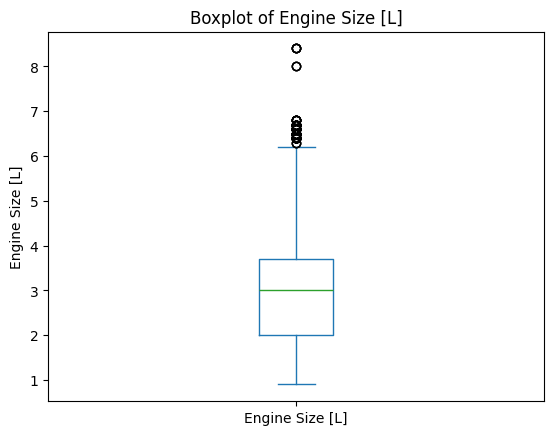

In [29]:
# create a boxplot for engine size
df.plot(kind='box', y='Engine Size [L]', title='Boxplot of Engine Size [L]', ylabel='Engine Size [L]')

Summarizing categorical data: frequency tables and mode.  
We can use the `describe()` method for string parameters as follows:

In [30]:
df.describe(include='object')

,Make,Model,Vehicle Class,Transmission,Fuel Type
count,7385,7385,7385,7385,7385
unique,42,2053,16,27,5
top,FORD,F-150 FFV 4X4,SUV - SMALL,AS6,X
freq,628,32,1217,1324,3637


We can also create **frequency tables** for each parameter using the `value_counts()` method

In [31]:
df['Fuel Type'].value_counts()

Fuel Type
X    3637
Z    3202
E     370
D     175
N       1
Name: count, dtype: int64

Text(0.5, 1.0, 'Fuel Type Counts')

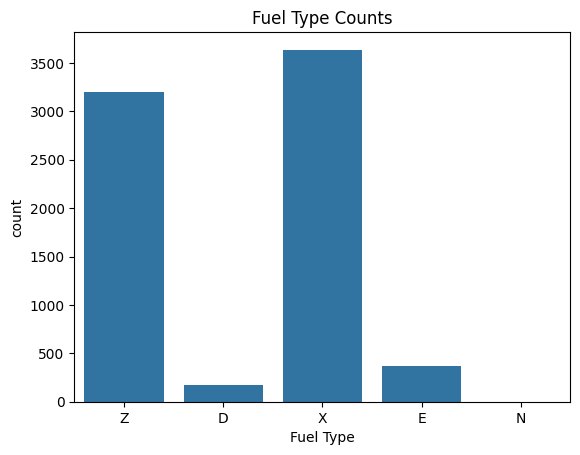

In [32]:
# create a countplot for fuel type
sns.countplot(x='Fuel Type', data=df)
plt.title('Fuel Type Counts')

<hr id="corr">

<h2>3. Correlation Statistics</h2>

<h3> Pearson Correlation Coefficient (Pearson's r)</h3>


The Pearson correlation coefficient, also known as Pearson's r, is a statistical measure of the **linear correlation** between two variables. It is a number between -1 and 1.

**Pearson's r**
- A value close to 1 indicates positive correlation
- A value close to -1 indicates negative correlation
- A value close to 0 indicates no correlation

**P-value**  
The P-value is the probability value that the correlation between these two variables is statistically significant.   
It is typical to choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.  
  
| P-value   | Correlation Significance  |
| ---       | ---                       |
| `p < 0.01:`   | very strong evidence  |
| `p < 0.05:`   | strong evidence       |
| `p < 0.1:`    | weak evidence         |
| `p > 0.1:`    | no evidence           |

We can calculate the Pearson correlation in `Pandas` using the `DataFrame.corr()` method between numerical values

In [33]:
df[['Engine Size [L]', 'CO2 Emissions [g/km]']].corr()

,Engine Size [L],CO2 Emissions [g/km]
Engine Size [L],1.000000,0.851145
CO2 Emissions [g/km],0.851145,1.000000


We can also calculate the Pearson correlation using the `scipy.stats` module

In [34]:
# calculate correlation between two columns
stats.pearsonr(df['Engine Size [L]'], df['CO2 Emissions [g/km]'])

PearsonRResult(statistic=0.8511446437899963, pvalue=0.0)

We can also calculate a correlation matrix between **ALL** numerical variables in a dataframe as follows:

In [35]:
# calculate the correlation matrix
df.corr(numeric_only=True)

,Engine Size [L],Cylinders,Fuel Consumption City [L/100 km],Fuel Consumption Hwy [L/100 km],Fuel Consumption Comb [L/100 km],Fuel Consumption Comb [mpg],CO2 Emissions [g/km]
Engine Size [L],1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
Fuel Consumption City [L/100 km],0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy [L/100 km],0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb [L/100 km],0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel Consumption Comb [mpg],-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
CO2 Emissions [g/km],0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


An appropriate way to visualize a correlation matrix is through a heatmap

<Axes: >

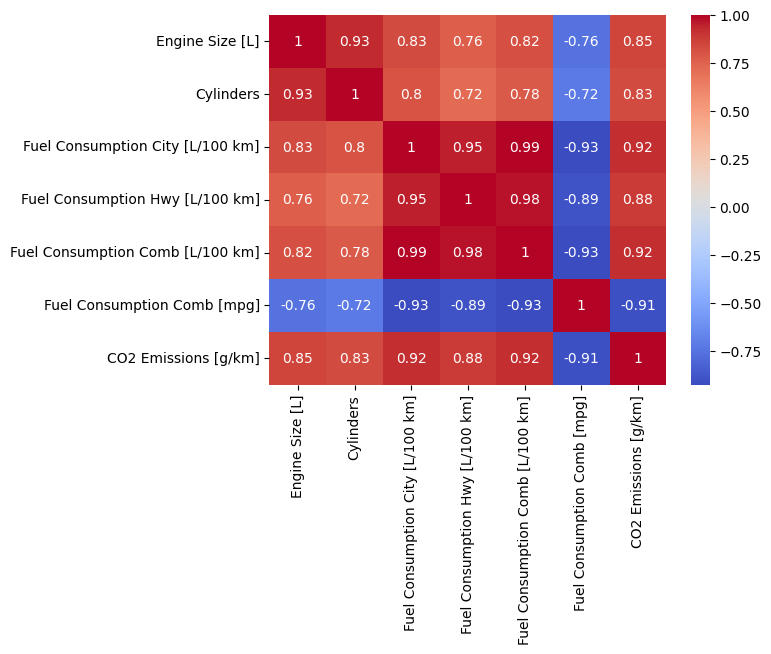

In [36]:
# plot the correlation matrix
df_corr = df.corr(numeric_only=True)
sns.heatmap(df_corr, annot=True, cmap='coolwarm')

An appropriate way to visualize the correlation between 2 parameters is through a scatter plot

Text(0.5, 1.0, 'Engine size vs CO2 emissions')

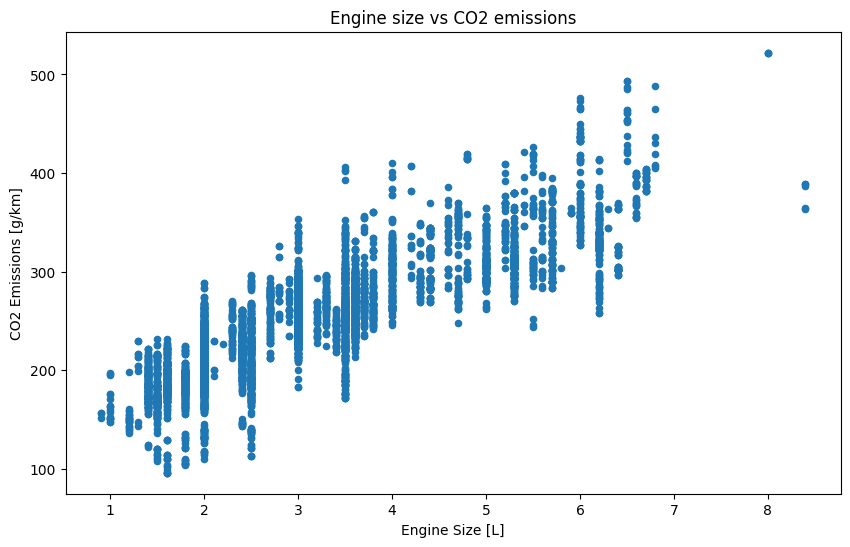

In [37]:
# plot the scatter plot between Years of Experience and Accident Level Num
df.plot(kind='scatter', x='Engine Size [L]', y='CO2 Emissions [g/km]', figsize=(10, 6))
plt.title('Engine size vs CO2 emissions')

array([[<Axes: xlabel='Engine Size [L]', ylabel='Engine Size [L]'>,
        <Axes: xlabel='Cylinders', ylabel='Engine Size [L]'>,
        <Axes: xlabel='Fuel Consumption City [L/100 km]', ylabel='Engine Size [L]'>,
        <Axes: xlabel='Fuel Consumption Hwy [L/100 km]', ylabel='Engine Size [L]'>,
        <Axes: xlabel='Fuel Consumption Comb [L/100 km]', ylabel='Engine Size [L]'>,
        <Axes: xlabel='Fuel Consumption Comb [mpg]', ylabel='Engine Size [L]'>,
        <Axes: xlabel='CO2 Emissions [g/km]', ylabel='Engine Size [L]'>],
       [<Axes: xlabel='Engine Size [L]', ylabel='Cylinders'>,
        <Axes: xlabel='Cylinders', ylabel='Cylinders'>,
        <Axes: xlabel='Fuel Consumption City [L/100 km]', ylabel='Cylinders'>,
        <Axes: xlabel='Fuel Consumption Hwy [L/100 km]', ylabel='Cylinders'>,
        <Axes: xlabel='Fuel Consumption Comb [L/100 km]', ylabel='Cylinders'>,
        <Axes: xlabel='Fuel Consumption Comb [mpg]', ylabel='Cylinders'>,
        <Axes: xlabel='CO2 Emissio

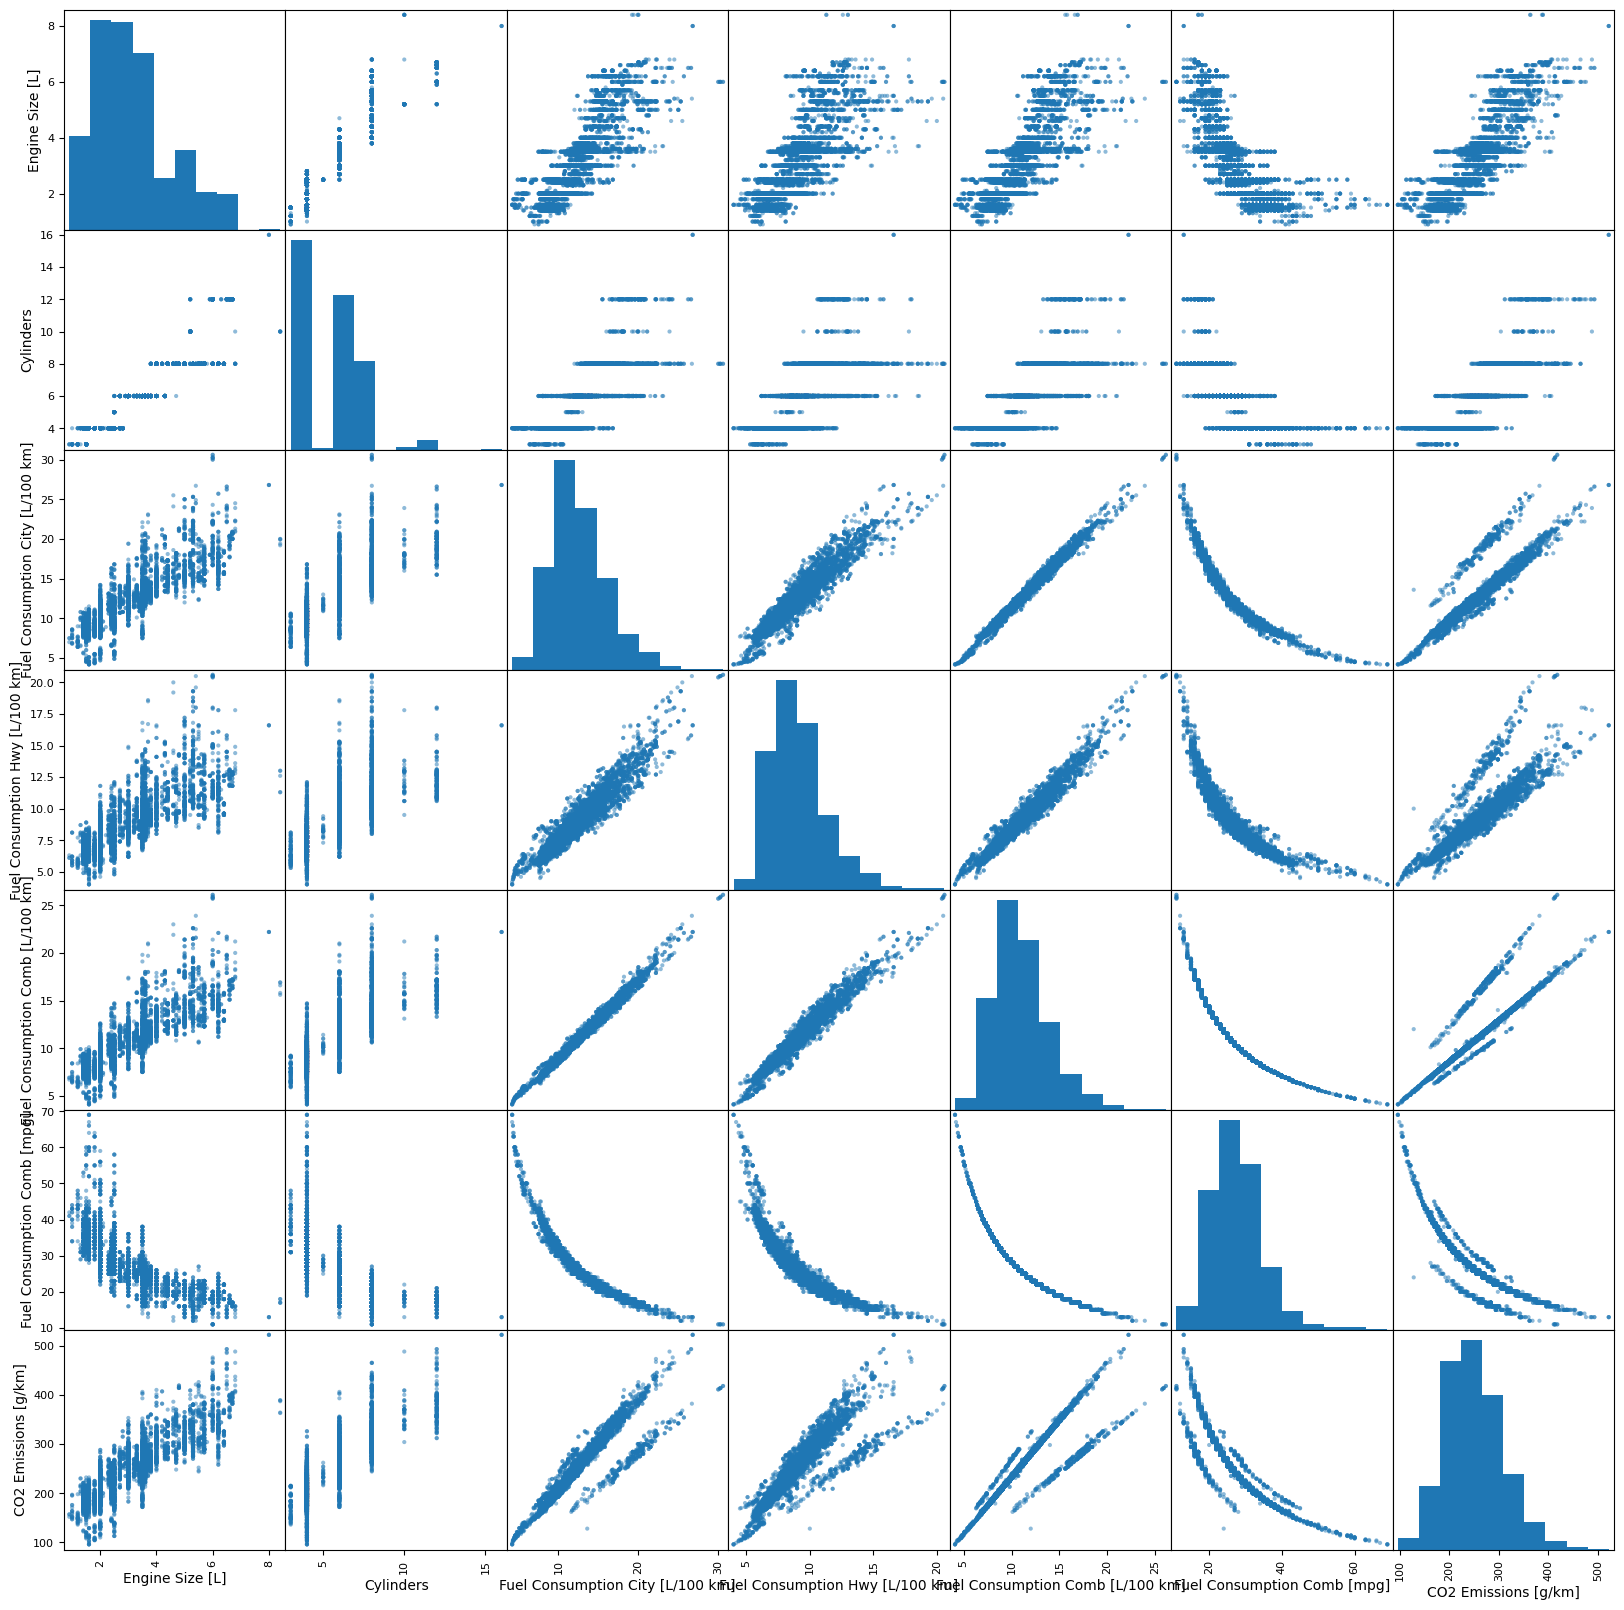

In [38]:
# create a scatter matrix
pd.plotting.scatter_matrix(df, figsize=(20, 20))

<h3>Chi-Square (<i>x</i><sup>2</sup>) Test</h3>

The chi-square test is a statistical hypothesis test that is used to determine whether there is a significant association between two **categorical variables**.  
The chi-square test is based on the comparison of **observed** and **expected** frequencies in a contingency table.  

A high chi-square value indicates that there is a strong association between the two categorical variables being tested.

In [39]:
# create the pivot/crosstab contingenncy table
pivot = pd.crosstab(df['Vehicle Class'], df['Fuel Type'])
pivot

Fuel Type,D,E,N,X,Z
Vehicle Class,,,,,
COMPACT,23,16,0,448,535
FULL-SIZE,3,50,0,282,304
MID-SIZE,26,23,1,597,486
MINICOMPACT,0,0,0,44,282
MINIVAN,0,11,0,69,0
PICKUP TRUCK - SMALL,24,0,0,135,0
PICKUP TRUCK - STANDARD,35,111,0,362,30
SPECIAL PURPOSE VEHICLE,0,11,0,57,9
STATION WAGON - MID-SIZE,0,0,0,24,29


In [ ]:
# perform the chi-square test
pivot = pd.crosstab(df['Vehicle Class'], df['Fuel Type'])
stats.chi2_contingency(pivot)

Chi2ContingencyResult(statistic=2648.3077211182026, pvalue=0.0, dof=60, expected_freq=array([[2.42180095e+01, 5.12037915e+01, 1.38388626e-01, 5.03319431e+02,
        4.43120379e+02],
       [1.51421801e+01, 3.20148951e+01, 8.65267434e-02, 3.14697766e+02,
        2.77058632e+02],
       [2.68483412e+01, 5.67650643e+01, 1.53419093e-01, 5.57985240e+02,
        4.91247935e+02],
       [7.72511848e+00, 1.63331077e+01, 4.41435342e-02, 1.60550034e+02,
        1.41347596e+02],
       [1.89573460e+00, 4.00812458e+00, 1.08327691e-02, 3.93987813e+01,
        3.46865267e+01],
       [3.76777251e+00, 7.96614760e+00, 2.15301286e-02, 7.83050779e+01,
        6.89394719e+01],
       [1.27488152e+01, 2.69546378e+01, 7.28503724e-02, 2.64956804e+02,
        2.33266892e+02],
       [1.82464455e+00, 3.85781991e+00, 1.04265403e-02, 3.79213270e+01,
        3.33857820e+01],
       [1.25592417e+00, 2.65538253e+00, 7.17670955e-03, 2.61016926e+01,
        2.29798240e+01],
       [5.97156398e+00, 1.26255924e+01, 3

Text(0.5, 1.0, 'Vehicle Class vs Fuel Type')

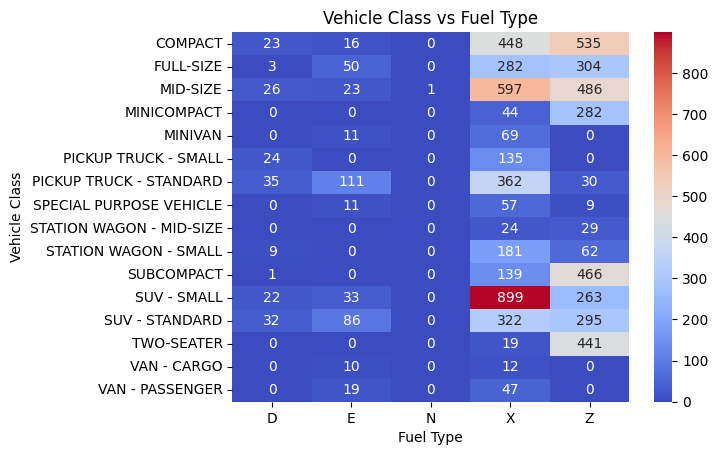

In [41]:
# create a heatmap
sns.heatmap(pivot, annot=True, fmt='d', cmap='coolwarm')

# title
plt.title('Vehicle Class vs Fuel Type')

<h3>ANOVA: Analysis of Variance</h3>

The Analysis of Variance  (ANOVA) is a statistical method used to determine whether there are significant differences between the means of two or more groups. It is a powerful tool for analyzing data from experiments and observational studies.  

A high `F-score` suggests that the independent variable has a significant effect on the dependent variable (outcome).  
And the `P-value` determines whether the `F-score` is statistically significant or not.

In [47]:
# calculate ANOVA for Industry Sector and Accident Level Num
# group the data by fuel type and corresponding CO2 emissions
df_anova = df[['Fuel Type', 'CO2 Emissions [g/km]']].groupby(['Fuel Type'])
df_anova.head()

,Fuel Type,CO2 Emissions [g/km]
0,Z,196
1,Z,221
2,Z,136
3,Z,255
4,Z,244
28,D,217
30,D,217
33,D,224
37,D,224
41,D,244


In [ ]:
# perform the ANOVA test
df_anova = df[['Fuel Type', 'CO2 Emissions [g/km]']].groupby(['Fuel Type'])
anova_results = stats.f_oneway(
    df_anova.get_group('X')['CO2 Emissions [g/km]'],
    df_anova.get_group('Z')['CO2 Emissions [g/km]'],
    df_anova.get_group('D')['CO2 Emissions [g/km]'],
    df_anova.get_group('E')['CO2 Emissions [g/km]'],
    df_anova.get_group('N')['CO2 Emissions [g/km]']
)
anova_results

F_onewayResult(statistic=148.94555963595639, pvalue=1.0628103973013771e-122)

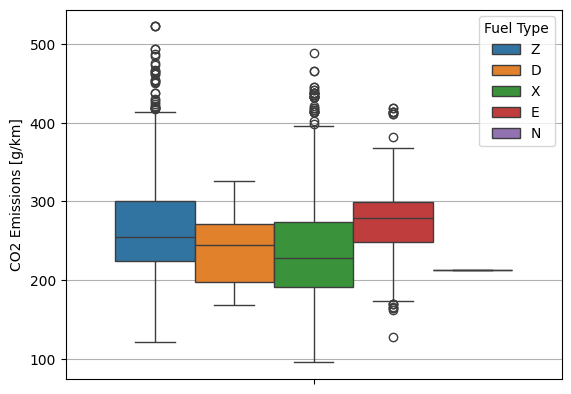

In [44]:
# box plot
sns.boxplot(y=df['CO2 Emissions [g/km]'], hue=df['Fuel Type'])

# show grid lines
plt.grid(axis='y')

<hr style="margin-top: 4rem;">
<h2>Author</h2>

<a href="https://github.com/SamerHany">Samer Hany</a>

<h2>References</h2>
<a href="https://www.w3schools.com/python/default.asp">w3schools.com</a>
<br>
<a href="https://www.kaggle.com/datasets/mrmorj/car-fuel-emissions">CO2 emissions dataset (kaggle.com)</a>